<a href="https://colab.research.google.com/github/swikriti15/parkinson-ml/blob/main/Parkinsons_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Replace the path below with the actual path to your file in Google Drive
data = pd.read_csv('/content/drive/MyDrive/parkinsons_updrs_renamed.csv')

In [4]:
# Dataset preview
print("display preview")
display(data.head())

display preview


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
# 1. Checking missing values
print("\nmissing values")
print(data.isnull().sum())


missing values
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [6]:
#2. checking duplicate values
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


In [7]:
#3. check datatypes of columns
print("data types")
print(data.dtypes)

data types
subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


In [8]:
# 4.  Since no missing value and duplication in data is found the data set is cleaned and can be used for Preprocessing
print("cleaned dataset sample", data.shape)

cleaned dataset sample (5875, 22)


In [9]:
# Preprocessing
# copying dataset to avoid changing the original data
df = data.copy()

# 1. checking if data set contains any other numeric values than 1 and 0
print(df['sex'].unique())

[0 1]


In [10]:
#2. Dropping subject coloumn as it is not necessary
if 'subject#' in df.columns :
    df = df.drop('subject#', axis = 1)
    print('dropped subject number column')

display(df.head())

dropped subject number column


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [11]:

# Define features (X) and target (y)
# Example: Classification (binary: disease progression severity)
X = data.drop(['total_UPDRS', 'motor_UPDRS'], axis=1)   # features
y = (data['total_UPDRS'] > data['total_UPDRS'].median()).astype(int)
# Binary target: 0 = low UPDRS, 1 = high UPDRS

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


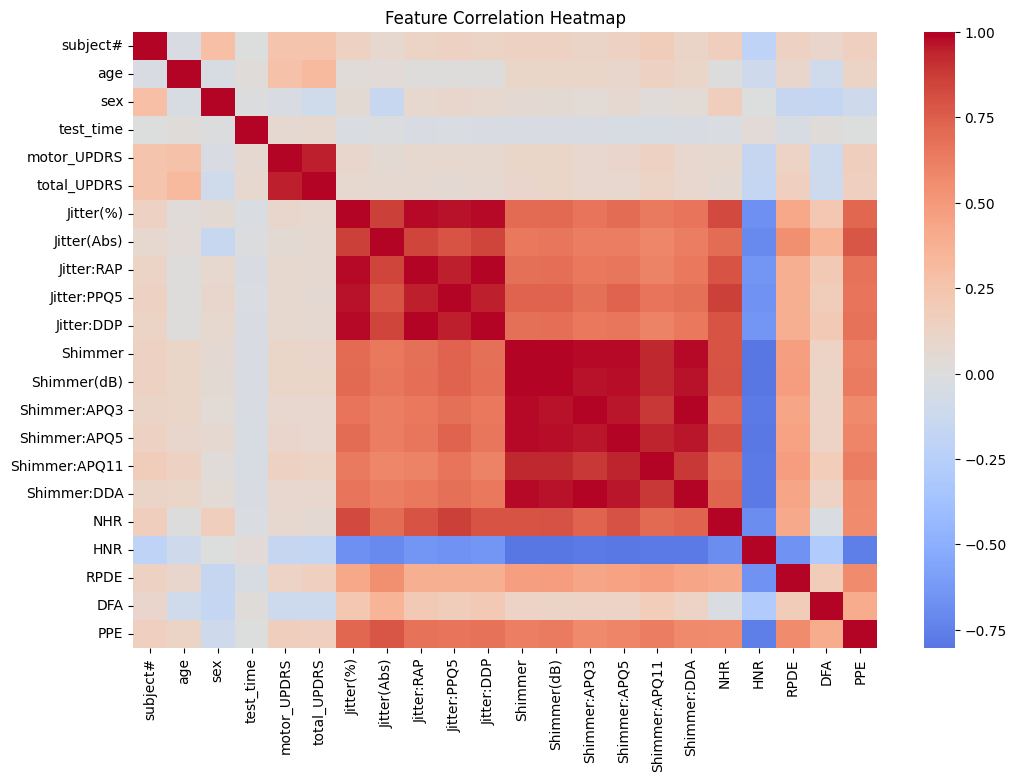

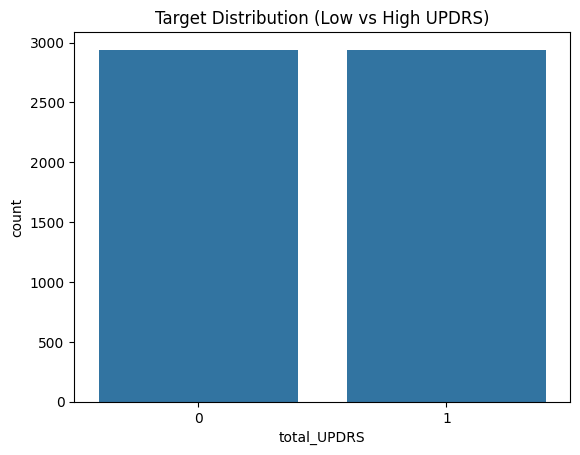

In [12]:
##Exploratory Data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of target
sns.countplot(x=y)
plt.title("Target Distribution (Low vs High UPDRS)")
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
display(cm)

Accuracy: 0.9370
Precision: 0.9340
Recall: 0.9404
F1-score: 0.9372

Confusion Matrix:


array([[549,  39],
       [ 35, 552]])

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1-score: {f1_svm:.4f}")

# Display confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:")
display(cm_svm)

SVM Accuracy: 0.9268
SVM Precision: 0.9239
SVM Recall: 0.9302
SVM F1-score: 0.9270

SVM Confusion Matrix:


array([[543,  45],
       [ 41, 546]])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)   # trees don’t need scaling

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

# Display confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
display(cm_rf)

Random Forest Accuracy: 0.9660
Random Forest Precision: 0.9675
Random Forest Recall: 0.9642
Random Forest F1-score: 0.9659

Random Forest Confusion Matrix:


array([[569,  19],
       [ 21, 566]])

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_knn, "kNN")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- kNN ---
Accuracy: 0.9370212765957446
Precision: 0.934010152284264
Recall: 0.9403747870528109
F1 Score: 0.9371816638370118

Confusion Matrix:
 [[549  39]
 [ 35 552]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       588
           1       0.93      0.94      0.94       587

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175


--- SVM ---
Accuracy: 0.9268085106382978
Precision: 0.9238578680203046
Recall: 0.9301533219761499
F1 Score: 0.9269949066213922

Confusion Matrix:
 [[543  45]
 [ 41 546]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       588
           1       0.92      0.93      0.93       587

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted a

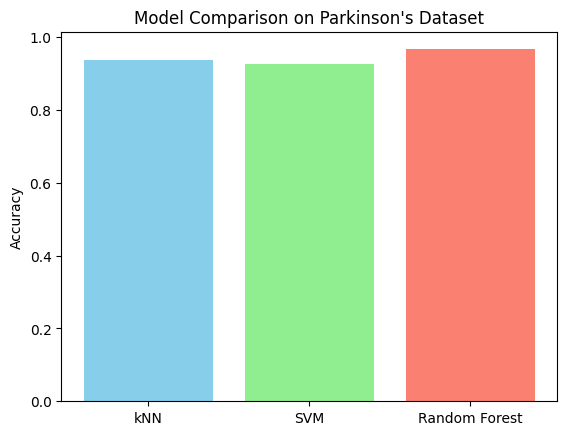

In [20]:
models = ["kNN", "SVM", "Random Forest"]
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
]

plt.bar(models, accuracies, color=["skyblue","lightgreen","salmon"])
plt.ylabel("Accuracy")
plt.title("Model Comparison on Parkinson's Dataset")
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # Use accuracy for classification grid search

# Define a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune for the classifier
param_grid_classifier = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}

# Set up GridSearchCV for the classifier
grid_rf_classifier = GridSearchCV(rf_classifier, param_grid_classifier, cv=5, scoring='accuracy')

# Train the classifier using the training data (X_train and the binary y_train)
# Make sure X_train and y_train are the ones derived after preprocessing (e.g., dropping subject#)

# Explicitly drop 'subject#' from X_train and X_test before training
X_train_no_subject = X_train.drop('subject#', axis=1, errors='ignore')
X_test_no_subject = X_test.drop('subject#', axis=1, errors='ignore')


grid_rf_classifier.fit(X_train_no_subject, y_train)

# Get the best trained classifier model
best_rf_classifier = grid_rf_classifier.best_estimator_

print("Best parameters found for RandomForestClassifier:")
print(grid_rf_classifier.best_params_)

# Make predictions on the test set with the best classifier
y_pred_rf_classifier = best_rf_classifier.predict(X_test_no_subject) # Predict using data without subject#

# Evaluate the classifier
accuracy_classifier = accuracy_score(y_test, y_pred_rf_classifier)
print(f"\nRandom Forest Classifier Accuracy on Test Set: {accuracy_classifier:.4f}")

Best parameters found for RandomForestClassifier:
{'max_depth': None, 'n_estimators': 200}

Random Forest Classifier Accuracy on Test Set: 0.9464


In [22]:
# Example of a new data point (replace with your actual new data)
# This data point must have 20 features in the exact same order as the data used to train the model.
# Assuming the model was trained with 'subject#' as the first feature, followed by:
# age, sex, test_time, Jitter(%), Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP,
# Shimmer, Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA,
# NHR, HNR, RPDE, DFA, PPE
new_data_point_for_classification = [[ 68, 1, 75.0, 0.005, 0.00003, 0.0035, 0.003, 0.0105, 0.025, 0.25, 0.015, 0.018, 0.022, 0.045, 0.02, 21.0, 0.55, 0.65, 0.20]] # Example features - 20 features (including a placeholder for subject#)

# Make a prediction using the best Random Forest Classifier model
predicted_class = best_rf_classifier.predict(new_data_point_for_classification)

# Interpret the predictionxx
if predicted_class[0] == 1:
    print("Based on the provided data, the model predicts: Likely High UPDRS (corresponding to your 'Parkinson's' category)")
else:
    print("Based on the provided data, the model predicts: Likely Low UPDRS (corresponding to your 'Not Parkinson's' category)")

Based on the provided data, the model predicts: Likely High UPDRS (corresponding to your 'Parkinson's' category)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use the best trained Random Forest Classifier model
model_to_evaluate = best_rf_classifier

# Perform k-fold cross-validation (e.g., with k=5)
# Use the training data (X_train_no_subject and y_train) for cross-validation after finding best hyperparameters
scores = cross_val_score(model_to_evaluate, X_train_no_subject, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation scores (accuracy) for each fold:", scores)

# Print the average accuracy and standard deviation
print(f"Average cross-validation accuracy: {np.mean(scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(scores):.4f}")

Cross-validation scores (accuracy) for each fold: [0.91808511 0.92234043 0.92765957 0.92234043 0.91702128]
Average cross-validation accuracy: 0.9215
Standard deviation of cross-validation accuracy: 0.0038


Feature Importances:


,Feature,Importance
0,age,0.261754
17,DFA,0.083020
16,RPDE,0.060981
2,test_time,0.058525
4,Jitter(Abs),0.053772
15,HNR,0.050140
18,PPE,0.041391
12,Shimmer:APQ11,0.040014
14,NHR,0.037723
10,Shimmer:APQ3,0.034222


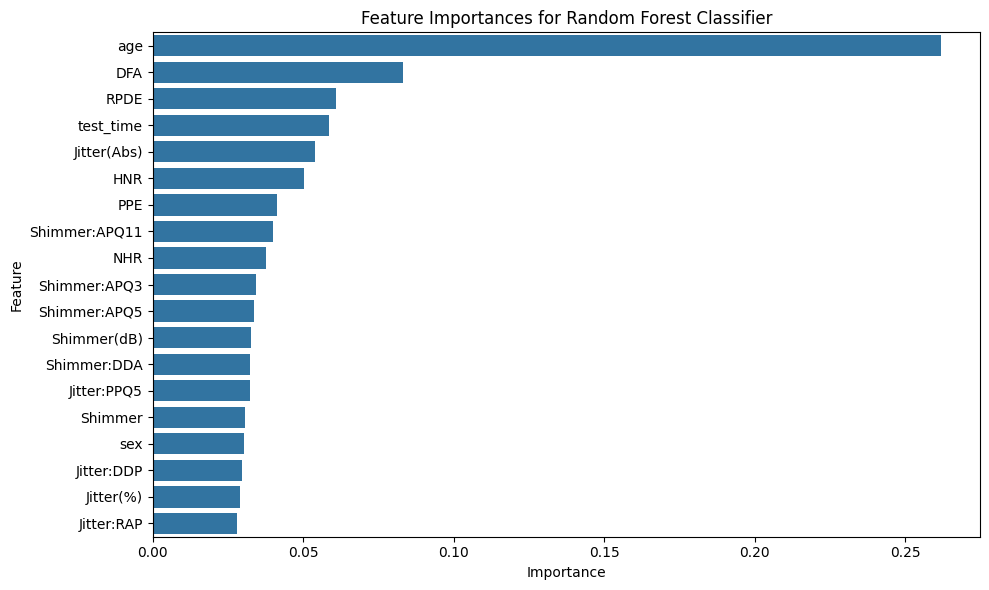

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best Random Forest Classifier model
feature_importances = best_rf_classifier.feature_importances_

# Get the names of the features from the data the model was trained on
# The model was trained on X_train_no_subject
feature_names = X_train_no_subject.columns

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
display(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [25]:
# Evaluate the best RandomForestClassifier model on the test data
# using the evaluate_model function
evaluate_model(y_test, y_pred_rf_classifier, "Random Forest Classifier - Test Set")


--- Random Forest Classifier - Test Set ---
Accuracy: 0.9463829787234043
Precision: 0.9352159468438538
Recall: 0.959114139693356
F1 Score: 0.9470142977291842

Confusion Matrix:
 [[549  39]
 [ 24 563]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       588
           1       0.94      0.96      0.95       587

    accuracy                           0.95      1175
   macro avg       0.95      0.95      0.95      1175
weighted avg       0.95      0.95      0.95      1175



In [26]:
import joblib

# Define the filename for saving the model
model_filename = 'random_forest_classifier_model.joblib'

# Save the best_rf_classifier model to the file
joblib.dump(best_rf_classifier, model_filename)

print(f"Model saved successfully to {model_filename}")

Model saved successfully to random_forest_classifier_model.joblib


In [27]:
import joblib

# Define the filename of the saved model
model_filename = 'random_forest_classifier_model.joblib'

# Load the model from the file
loaded_model = joblib.load(model_filename)

print(f"Model loaded successfully from {model_filename}")

# You can now use the 'loaded_model' to make predictions
# For example:
# new_data_point = [[...]] # Your new data point with the same features as the training data
# prediction = loaded_model.predict(new_data_point)
# print("Prediction:", prediction)

Model loaded successfully from random_forest_classifier_model.joblib
